In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("titanictrain.csv")
test=pd.read_csv("titanictest.csv")
train[:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# 891 rows
len(train)

891

In [4]:
# Missing variables
total = train.isnull().sum().sort_values(ascending=False)
total.index.name = ['Feature']
print(total[:25])

[Feature]
Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [5]:
for i in range(12):
    tnull=train[train.columns[i]].isnull().sum()
    if tnull>0:
        print(train.columns[i],":",(tnull/891)*100)

Age : 19.865319865319865
Cabin : 77.10437710437711
Embarked : 0.22446689113355783


In [6]:
# 418 columns
len(test)

418

In [7]:
for i in range(11):
    tnull=test[test.columns[i]].isnull().sum()
    if tnull>0:
        print(test.columns[i],":",(tnull/418)*100)

Age : 20.574162679425836
Fare : 0.23923444976076555
Cabin : 78.22966507177034


In [8]:
# 12 features
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# dropping the data that does not contribute
train = train.drop(columns=['Cabin','Embarked','Name','Ticket'],axis=0)
test = test.drop(columns=['Cabin','Embarked','Name','Ticket'],axis=0)

In [10]:
# dealing with the missing entries
train=train.fillna(29)
test=test.fillna(29)

In [11]:
# checking for missing data
train.isnull().sum().max()

0

In [12]:
# checking for missing data
test.isnull().sum().max()

0

<b>Dropped:</b> Cabin, Embarked, Name, and Ticket

Cabin has the largest missing entries
Embarked did not seem important
Ticket isn't necessary as an identifier since PassengerId exists

<b>Planning on dropping:</b> Fare, SibSp, Parch

Fare and Class are related

In [13]:
# dropping the data that does not contribute
train = train.drop(columns=['Fare','SibSp','Parch'],axis=0)
test = test.drop(columns=['Fare','SibSp','Parch'],axis=0)

In [14]:
train[:15]

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
5,6,0,3,male,29.0
6,7,0,1,male,54.0
7,8,0,3,male,2.0
8,9,1,3,female,27.0
9,10,1,2,female,14.0


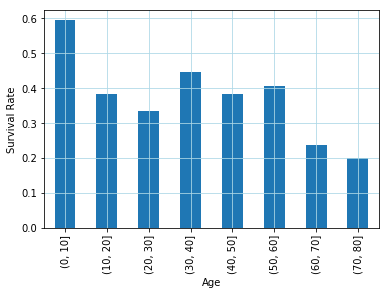

In [15]:
# survival rate per age
group_by_age = pd.cut(train["Age"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()
plt.ylabel('Survival Rate')
plt.grid(c="lightblue")

In [16]:
# Mean of age
meanAge=train["Age"].mean()
meanAge

29.56023569023569

In [17]:
# Median of age
medAge=train["Age"].median()
medAge

29.0

In [18]:
# one-hot encoding for Sex feature
train['Sex'] = pd.get_dummies(train.Sex, drop_first=True)
test['Sex']= pd.get_dummies(train.Sex, drop_first=True)

In [19]:
# Sex: 0 female, 1 male
train[:15]

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,22.0
1,2,1,1,0,38.0
2,3,1,3,0,26.0
3,4,1,1,0,35.0
4,5,0,3,1,35.0
5,6,0,3,1,29.0
6,7,0,1,1,54.0
7,8,0,3,1,2.0
8,9,1,3,0,27.0
9,10,1,2,0,14.0


In [20]:
# Mean: survival rate
# Count: total observations
# Sum: people survived
# Sex: 0 female, 1 male
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.742038   314  233
1    0.188908   577  109

In [21]:
#39 percent is total survived
count=0
for i in range(714):
    if train["Survived"][i]==1:
        count=count+1
print(count,count/714)

279 0.3907563025210084


In [22]:
# 0: under 10 years old
# 1: 10.5-30 years  old
# 2: 30.5-60 years old 
# 3: 60.5-100 years old

train['Age']=np.where(train['Age'].between(0,10),0,train['Age'])
train['Age']=np.where(train['Age'].between(10.5,30),1,train['Age'])
train['Age']=np.where(train['Age'].between(30.5,60),2,train['Age'])
train['Age']=np.where(train['Age'].between(60.5,100),3,train['Age'])
train[:10]

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,1.0
1,2,1,1,0,2.0
2,3,1,3,0,1.0
3,4,1,1,0,2.0
4,5,0,3,1,2.0
5,6,0,3,1,1.0
6,7,0,1,1,2.0
7,8,0,3,1,0.0
8,9,1,3,0,1.0
9,10,1,2,0,1.0


In [23]:
test['Age']=np.where(test['Age'].between(0,10),0,test['Age'])
test['Age']=np.where(test['Age'].between(10.5,30),1,test['Age'])
test['Age']=np.where(test['Age'].between(30.5,60),2,test['Age'])
test['Age']=np.where(test['Age'].between(60.5,100),3,test['Age'])

In [24]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
X = train.drop(['Survived','PassengerId'], axis=1).values
Y = train['Survived'].values
XTRAIN  = test.drop(['PassengerId'], axis=1)

In [26]:
nsplit=100
depth=3
errs=[]
for j in range(nsplit):
    XTRAIN, XTEST, YTRAIN, YTEST, =train_test_split(X,Y,test_size=0.2)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN,YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("Decision Tree Depth = %d mean error = %7.6f SD=%7.6f"\
      %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 3 mean error = 0.204078 SD=0.029545


In [27]:
# accuracy score using Decision Tree Classifier
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(XTRAIN,YTRAIN)
clf.score(XTEST,YTEST)

0.7821229050279329

In [28]:
# accuracy score using Random Forest Classifier
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit (XTRAIN, YTRAIN)
clf.score (XTEST, YTEST)

0.7821229050279329

In [29]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO 

In [30]:
dot_data = tree.export_graphviz(DT, out_file=None, rotate=False, 
            feature_names=["Pclass","Sex","Age",],
            class_names=list(map(str,['Survived','Died'])),
 filled=True, rounded=True, special_characters=True)

In [31]:
graph2 = pydotplus.graph_from_dot_data(dot_data)  

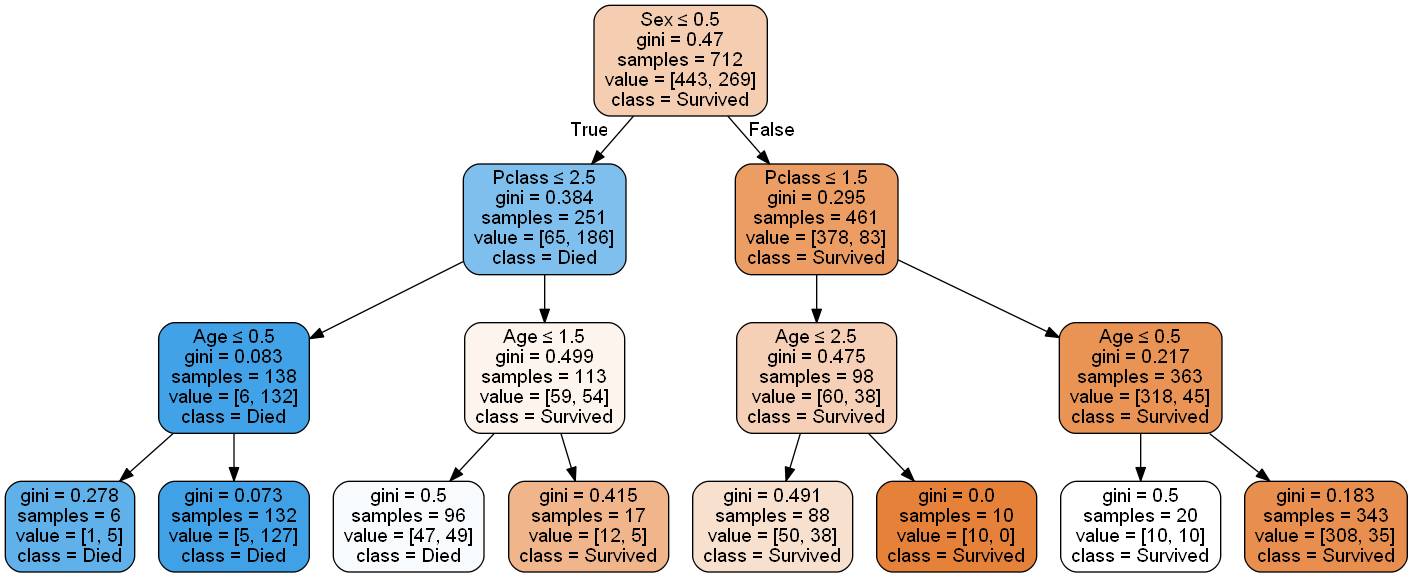

In [32]:
Image(graph2.create_png())

In [33]:
# accuracy across the training dataset
acc_decision_tree = round(DT.score(XTRAIN, YTRAIN) * 100, 2)
acc_decision_tree

80.2

In [34]:
submission_1 = pd.DataFrame(columns=['PassengerId','Survived'])
submission_1['PassengerId']=test.PassengerId

In [35]:
X2 = test.drop(['PassengerId'], axis=1).values
clf.fit (X,Y)
predictions = clf.predict(X2)

In [36]:
submission_1['Survived']=predictions
submission_1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [37]:
submission_1.to_csv('submission_1.csv', index=False)